# Notebook para testar deferentes ferramentas no projeto
08/18/2023, Diego Ferruzzo, diego.ferruzzo@ufabc.edu.br

In [1]:
from quad_control import Controller
import numpy as np
import matplotlib.pyplot as plt
from quat_utils import Quat2Euler

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
# Define a classe waypoint
class waypoint:
    # waypoint
    def __init__(self, x: float, y: float, z: float, psi: float, t: float) -> None:
        self.x: float = x
        self.y: float = y
        self.z: float = z
        self.psi: float = psi
        self.t: float = t       # time
    
    def __repr__(self) -> str:
        return "{}(x={}, y={}, z={}, psi={}, time={})".format(self.__class__.__name__, self.x, self.y, self.z, self.psi, self.t)


def get_quaternion_from_euler(roll, pitch, yaw):
    """
    Convert an Euler angle to a quaternion.
    Input
    :param roll: The roll (rotation around x-axis) angle in radians.
    :param pitch: The pitch (rotation around y-axis) angle in radians.
    :param yaw: The yaw (rotation around z-axis) angle in radians.
    
    Output
    :return qx, qy, qz, qw: The orientation in quaternion [x,y,z,w] format
    """
    qw = np.cos(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)
    qx = np.sin(roll/2) * np.cos(pitch/2) * np.cos(yaw/2) - np.cos(roll/2) * np.sin(pitch/2) * np.sin(yaw/2)
    qy = np.cos(roll/2) * np.sin(pitch/2) * np.cos(yaw/2) + np.sin(roll/2) * np.cos(pitch/2) * np.sin(yaw/2)
    qz = np.cos(roll/2) * np.cos(pitch/2) * np.sin(yaw/2) - np.sin(roll/2) * np.sin(pitch/2) * np.cos(yaw/2)
    return np.array([qw, qx, qy, qz])

#Instance Controller Class
controller = Controller()

In [3]:
# Os waypoints da trajetória  
# formato: 
#
#     wp = waypoint(x, y, z, phi, tempo)
#
home = waypoint(0.6, 0.0, 0.0, 0.0, 0.0)
wp1  = waypoint(1.0, 0.0, 1.0, np.pi/6, 5.0)
wp2  = waypoint(1.5, 0.0, 2.0, np.pi/6, 10.0)
wp3  = waypoint(2.0, 0.5, 2.0, np.pi/8, 15.0)
wp4  = waypoint(2.0, 1.0, 2.0, 0, 20.0)

#Set sample time
step_controller = 0.01

In [4]:
x_wp = np.array([[home.x, wp1.x, wp2.x, wp3.x, wp4.x]]).T
y_wp = np.array([[home.y, wp1.y, wp2.y, wp3.y, wp4.y]]).T
z_wp = np.array([[home.z, wp1.z, wp2.z, wp3.z, wp4.z]]).T
psi_wp = np.array([[home.psi, wp1.psi, wp2.psi, wp3.psi, wp4.psi]]).T

#Define desired time
time = [home.t, wp1.t, wp2.t, wp3.t, wp4.t]
t0 = home.t
tf = wp4.t
#Define desired time
time = [home.t, wp1.t, wp2.t, wp3.t, wp4.t]
t0 = home.t
tf = wp4.t

#Compute minimum snap trajectory for position and minimum acceleration for yaw angle
_, _, x_matrix = controller.getCoeff_snap(x_wp, time)
_, _, y_matrix = controller.getCoeff_snap(y_wp, time)
_, _, z_matrix = controller.getCoeff_snap(z_wp, time)
_, _, psi_matrix = controller.getCoeff_accel(psi_wp, time)

x_ref, dotx_ref, ddotx_ref, _, _ = controller.evaluate_equations_snap(time, step_controller, x_matrix)
y_ref, doty_ref, ddoty_ref, _, _ = controller.evaluate_equations_snap(time, step_controller, y_matrix)
z_ref, dotz_ref, ddotz_ref, _, _ = controller.evaluate_equations_snap(time, step_controller, z_matrix)
psi_ref, _, _ = controller.evaluate_equations_accel(time, step_controller, psi_matrix)

time_v = np.arange(home.t, wp4.t, step_controller)


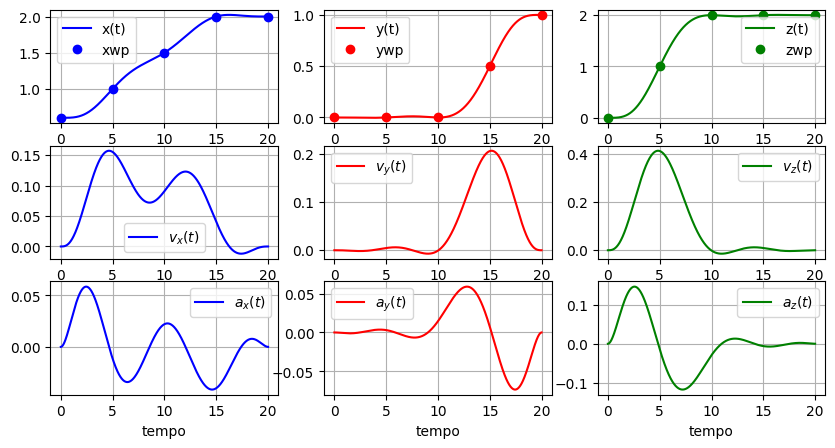

In [5]:
# positions
plt.subplot(3,3,1)
plt.plot(time_v,x_ref,'b-')
plt.plot(time,x_wp,'bo')
plt.xlabel('tempo')
plt.legend(['x(t)','xwp'])
plt.grid()
#
plt.subplot(3,3,2)
plt.plot(time_v,y_ref,'r-')
plt.plot(time,y_wp,'ro')
plt.xlabel('tempo')
plt.legend(['y(t)','ywp'])
plt.grid()
#
plt.subplot(3,3,3)
plt.plot(time_v,z_ref,'g-')
plt.plot(time,z_wp,'go')
plt.xlabel('tempo')
plt.legend(['z(t)','zwp'])
plt.grid()
#
# velocities
plt.subplot(3,3,4)
plt.plot(time_v, dotx_ref,'b-')
plt.xlabel('tempo')
plt.legend(['$v_x(t)$'])
plt.grid()
#
plt.subplot(3,3,5)
plt.plot(time_v, doty_ref,'r-')
plt.xlabel('tempo')
plt.legend(['$v_y(t)$'])
plt.grid()
#
plt.subplot(3,3,6)
plt.plot(time_v, dotz_ref,'g-')
plt.xlabel('tempo')
plt.legend(['$v_z(t)$'])
plt.grid()
#
# accelerations
plt.subplot(3,3,7)
plt.plot(time_v, ddotx_ref,'b-')
plt.xlabel('tempo')
plt.legend(['$a_x(t)$'])
plt.grid()
#
plt.subplot(3,3,8)
plt.plot(time_v, ddoty_ref,'r-')
plt.xlabel('tempo')
plt.legend(['$a_y(t)$'])
plt.grid()
#
plt.subplot(3,3,9)
plt.plot(time_v, ddotz_ref,'g-')
plt.xlabel('tempo')
plt.legend(['$a_z(t)$'])
plt.grid()
#
plt.show()

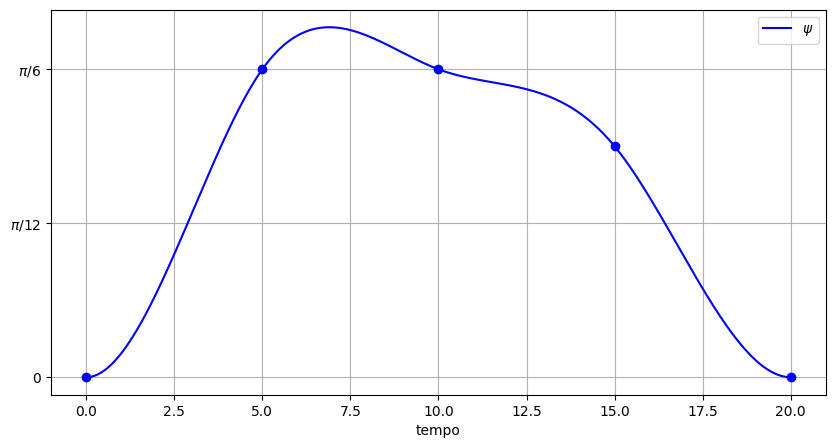

In [6]:
plt.plot(time_v,psi_ref,'b-')
plt.plot(time,psi_wp,'bo')
plt.grid()
plt.xlabel('tempo')
plt.legend(['$\psi$'])
plt.yticks([0, np.pi/12, np.pi/6], ['0', '$\pi/12$', '$\pi/6$'])
plt.show()

In [7]:
# calcula o quaternion em função de psi desejado
"""
qz_ref = []
qz_ref_v1 = []

for i in range(len(psi_ref)):
    q_z_ham = np.zeros((4,1))
    q_z_ham[0] = np.cos(psi_ref[i]/2)
    q_z_ham[-1] = np.sin(psi_ref[i]/2)
    q_z_ham_norm = np.linalg.norm(q_z_ham)
    q_z_ham = q_z_ham/q_z_ham_norm
    qz_ref.append(q_z_ham)
    
    qz_ref_v1.append(get_quaternion_from_euler(0, 0, psi_ref[i]).reshape(4,1)) 
"""

qz_ref = np.zeros((4,len(psi_ref)))
qz_ref_v1 = np.zeros((4,len(psi_ref)))

for i in range(len(psi_ref)):
    qz_ref[0,i] = np.cos(psi_ref[i]/2)
    qz_ref[-1,i] = np.sin(psi_ref[i]/2)
    qz_ref[:,i] = qz_ref[:,i]/np.linalg.norm(qz_ref[:,i])
    qz_ref_v1[:,i] = get_quaternion_from_euler(0, 0, psi_ref[i])    


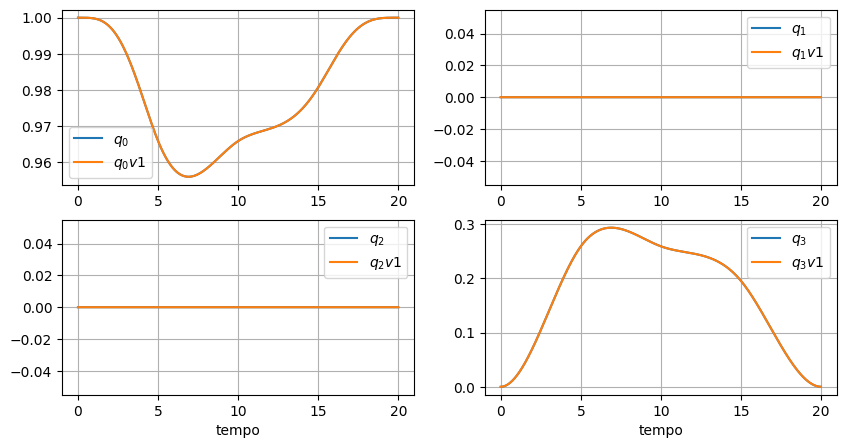

In [8]:
# gráficos dos auqternions relativos a psi
plt.subplot(2,2,1)
plt.plot(time_v,qz_ref[0,:])
plt.plot(time_v,qz_ref_v1[0,:])
plt.grid()
plt.legend(['$q_0$','$q_0v1$'])
#
plt.subplot(2,2,2)
plt.plot(time_v,qz_ref[1,:])
plt.plot(time_v,qz_ref_v1[1,:])
plt.grid()
plt.legend(['$q_1$','$q_1v1$'])
#
plt.subplot(2,2,3)
plt.plot(time_v,qz_ref[2,:])
plt.plot(time_v,qz_ref_v1[2,:])
plt.grid()
plt.legend(['$q_2$','$q_2v1$'])
plt.xlabel('tempo')
#
plt.subplot(2,2,4)
plt.plot(time_v,qz_ref[3,:])
plt.plot(time_v,qz_ref_v1[3,:])
plt.grid()
plt.legend(['$q_3$','$q_3v1$'])
plt.xlabel('tempo')
#
plt.show()

In [9]:
euler = np.zeros((3,len(psi_ref)))
for i in range(len(psi_ref)):
    euler[:,i]=Quat2Euler(qz_ref[:,i])[:,0]

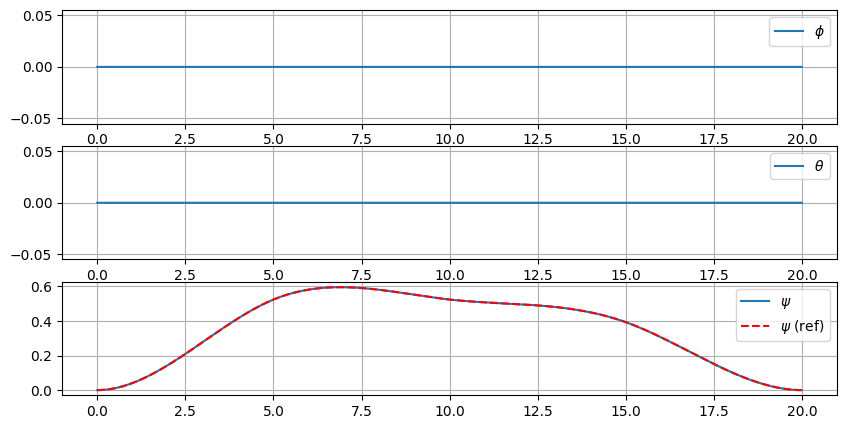

In [10]:
plt.subplot(3,1,1)
plt.plot(time_v,euler[0,:])
plt.legend(['$\phi$'])
plt.grid()

plt.subplot(3,1,2)
plt.plot(time_v,euler[1,:])
plt.legend(['$\\theta$'])
plt.grid()

plt.subplot(3,1,3)
plt.plot(time_v,euler[2,:])
plt.plot(time_v,psi_ref,'r--')
plt.legend(['$\psi$', '$\psi$ (ref)'])
plt.grid()

plt.show()


In [11]:
qz_ref[:,1]

array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.29758883e-06])

In [12]:
(Quat2Euler(qz_ref[:,2]))[:,0]


array([0.00000000e+00, 0.00000000e+00, 1.83606643e-05])

# Testando o produto '@'

In [1]:
from quad_control import Controller
import numpy as np 
controller = Controller()
pos_atual = np.array([[1,2,3]]).T
pos_des = np.array([[4,5,6]]).T
vel_atual = np.array([[7,8,9]]).T
vel_des = np.array([[2,4,6]]).T
accel_des = np.array([[3,5,7]]).T
controller.pos_control_quat(pos_atual, pos_des, vel_atual, vel_des, accel_des)

(121.45148249403958,
 array([[ 0.99904962],
        [-0.03873539],
        [ 0.01998582],
        [ 0.        ]]))

In [3]:
error_pos = pos_atual - pos_des
error_vel = vel_atual - vel_des
n = accel_des/np.linalg.norm(accel_des)
# velocidade desejada normalizada |vel_des| = 1
t = vel_des/np.linalg.norm(vel_des)
# produto vetorial dos vetores t e n
b = np.cross(t, n, axis=0)

In [6]:
# (error_pos.T@n)@n + (error_pos.T@b)@b
np.cross(error_pos,n,axis=0)

array([[-0.65858556],
       [ 1.31717112],
       [-0.65858556]])

In [8]:
np.cross(np.array([[0,1,0]]).T,np.array([[1,0,0]]).T, axis=0)

array([[ 0],
       [ 0],
       [-1]])

In [12]:
Kp = np.diag([4, 4, 20])*2.3


In [14]:
Kp

array([[ 9.2,  0. ,  0. ],
       [ 0. ,  9.2,  0. ],
       [ 0. ,  0. , 46. ]])

In [15]:
error_pos

array([[-3],
       [-3],
       [-3]])

In [16]:
Kp@error_pos

array([[ -27.6],
       [ -27.6],
       [-138. ]])